#¿Podemos predecir las especies de flores de Iris?

##CLASIFICACIÓN DE FLORES DE IRIS
El conjunto de datos Iris es bastante pequeño, con sólo 150 observaciones. Sus observaciones están divididas uniformemente en tres clases, lo que indica que probablemente fueron seleccionadas para demostrar el modelo discriminante lineal, en lugar de ser seleccionadas al azar de una población mayor de flores de iris. Es útil para practicar y demostrar algoritmos de clasificación, y a menudo se denomina conjunto de datos "de juguete".

La flor del iris tiene tres especies: setosa, versicolor y virginica, que se diferencian por sus medidas. Supongamos que disponemos de las medidas de las flores de iris según su especie y que nuestra tarea consiste en entrenar un modelo de aprendizaje automático que pueda aprender de las medidas de las especies de iris y clasificarlas. El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y la anchura de los sépalos y los pétalos, en centímetros.

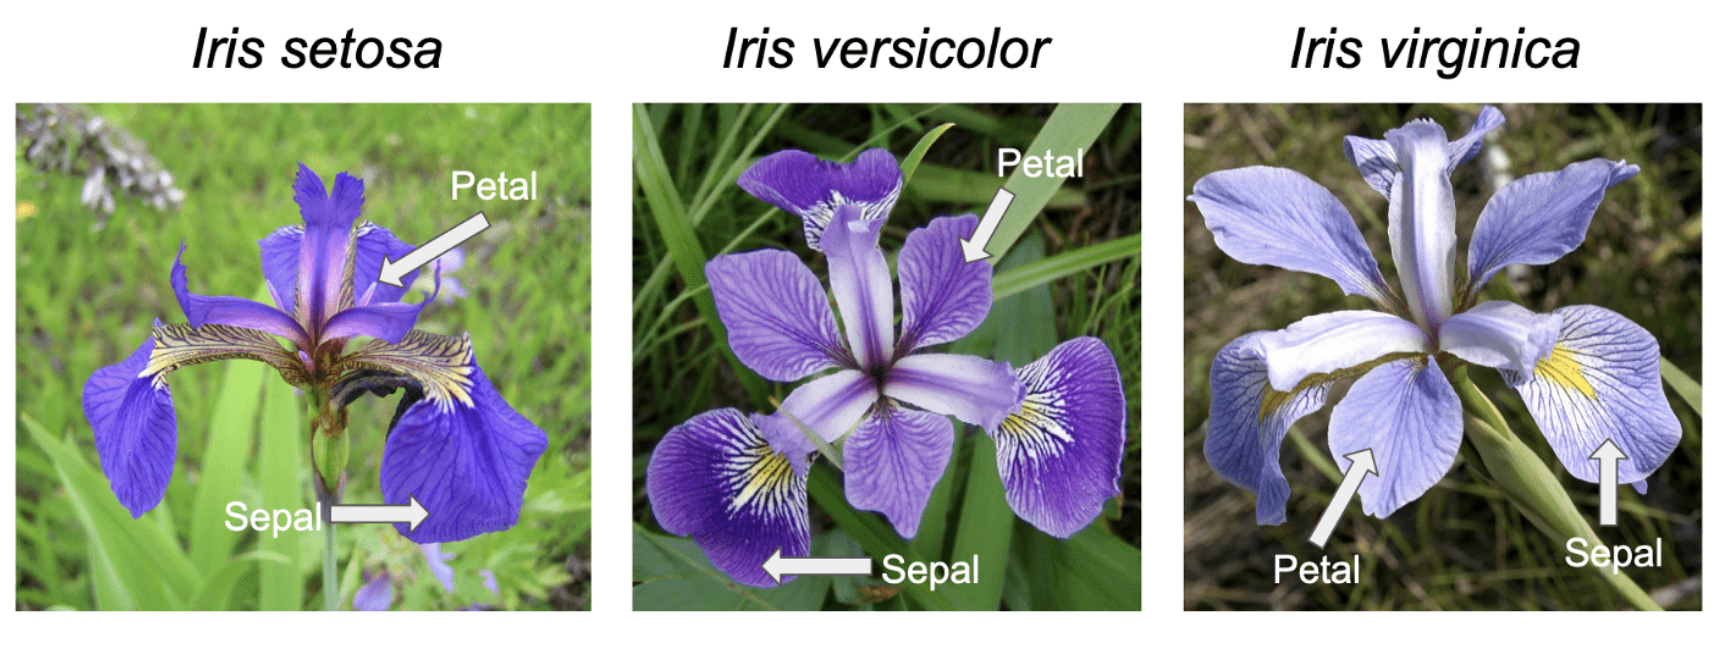

#información sobre las Variables de interés:
Id: El Id representa a cada registro de forma única(int)

LongitudSepalCm: Longitud del sépalo en centímetros(float)

AnchoSepalCm: Anchura del sépalo en centímetros(float)

PetalLengthCm: Longitud del pétalo en cm(float)

PetalWidthCm: Anchura del pétalo en cm(float)

Especies: Tipos de especies de flor de iris como setosa,versicolor,verginica(objeto)

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


# Cargar el conjunto de datos de iris
iris = pd.read_csv('/content/drive/MyDrive/Datos csv/Iris.csv')



In [ ]:
iris.tail(5)

In [ ]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris['SpeciesN']=0
for i in range(len(iris)):
  if iris['Species'][i]=='Iris-setosa':
    iris["SpeciesN"][i]=0
  elif iris['Species'][i]=='Iris-versicolor':
    iris["SpeciesN"][i]=1
  else:
    iris["SpeciesN"][i]=2

<ipython-input-5-5902c4bdb438>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris["SpeciesN"][i]=0
<ipython-input-5-5902c4bdb438>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris["SpeciesN"][i]=1
<ipython-input-5-5902c4bdb438>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris["SpeciesN"][i]=2


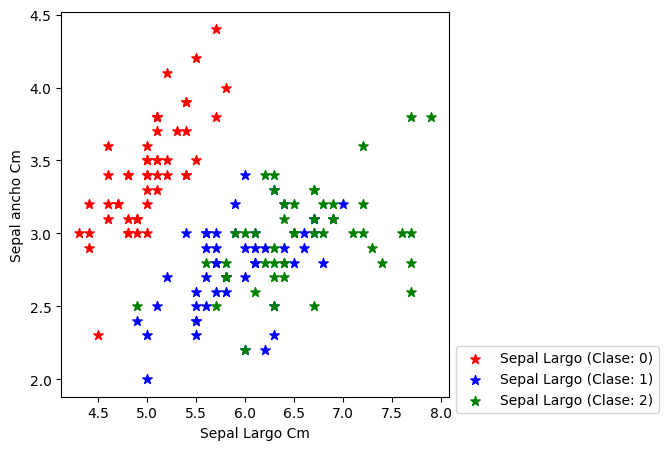

In [ ]:
setosa = iris[iris["SpeciesN"]==0]
versicolor = iris[iris["SpeciesN"]==1]
virginica = iris[iris["SpeciesN"]==2]

plt.figure(figsize=(5, 5))
plt.xlabel('Sepal Largo Cm', fontsize = 10.0)
plt.ylabel('Sepal ancho Cm', fontsize = 10.0)
plt.scatter(setosa["SepalLengthCm"], setosa["SepalWidthCm"], 
            label="Sepal Largo (Clase: 0)", marker="*", c="red", s=50)
plt.scatter(versicolor["SepalLengthCm"], versicolor["SepalWidthCm"], 
            label="Sepal Largo (Clase: 1)", marker="*", c="blue", s=50)
plt.scatter(virginica["SepalLengthCm"], virginica["SepalWidthCm"], 
            label="Sepal Largo (Clase: 2)", marker="*", c="green", s=50)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

In [ ]:
irisplot=iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]]

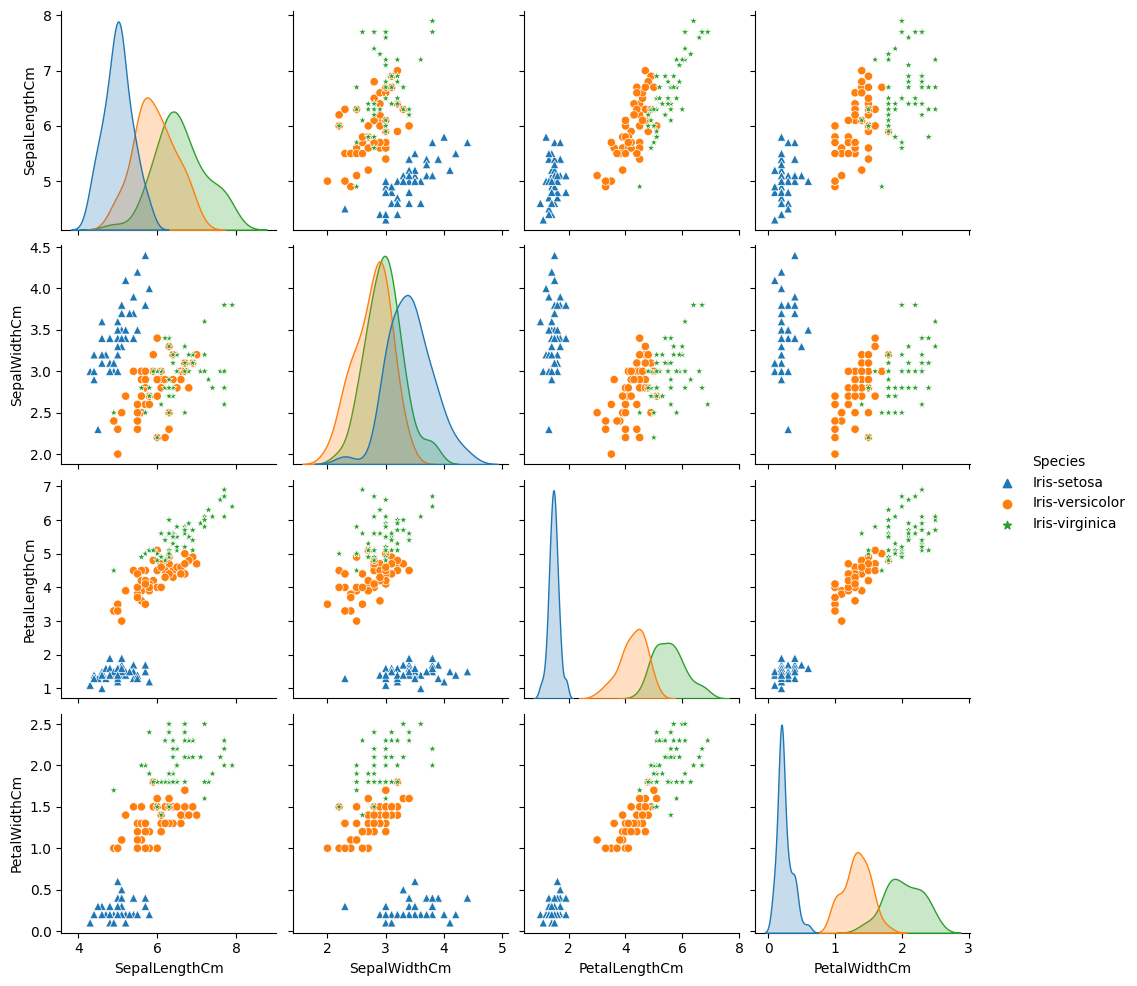

In [ ]:

sns.pairplot(irisplot, hue="Species", markers=["^", "o", "*"])

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
iris["SpeciesN"] = pd.factorize(iris.Species)[0]
X_train, X_test, y_train, y_test = train_test_split(iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]], iris['SpeciesN'], test_size=0.3, random_state=1)



Precisión del árbol de decisión: 0.9555555555555556


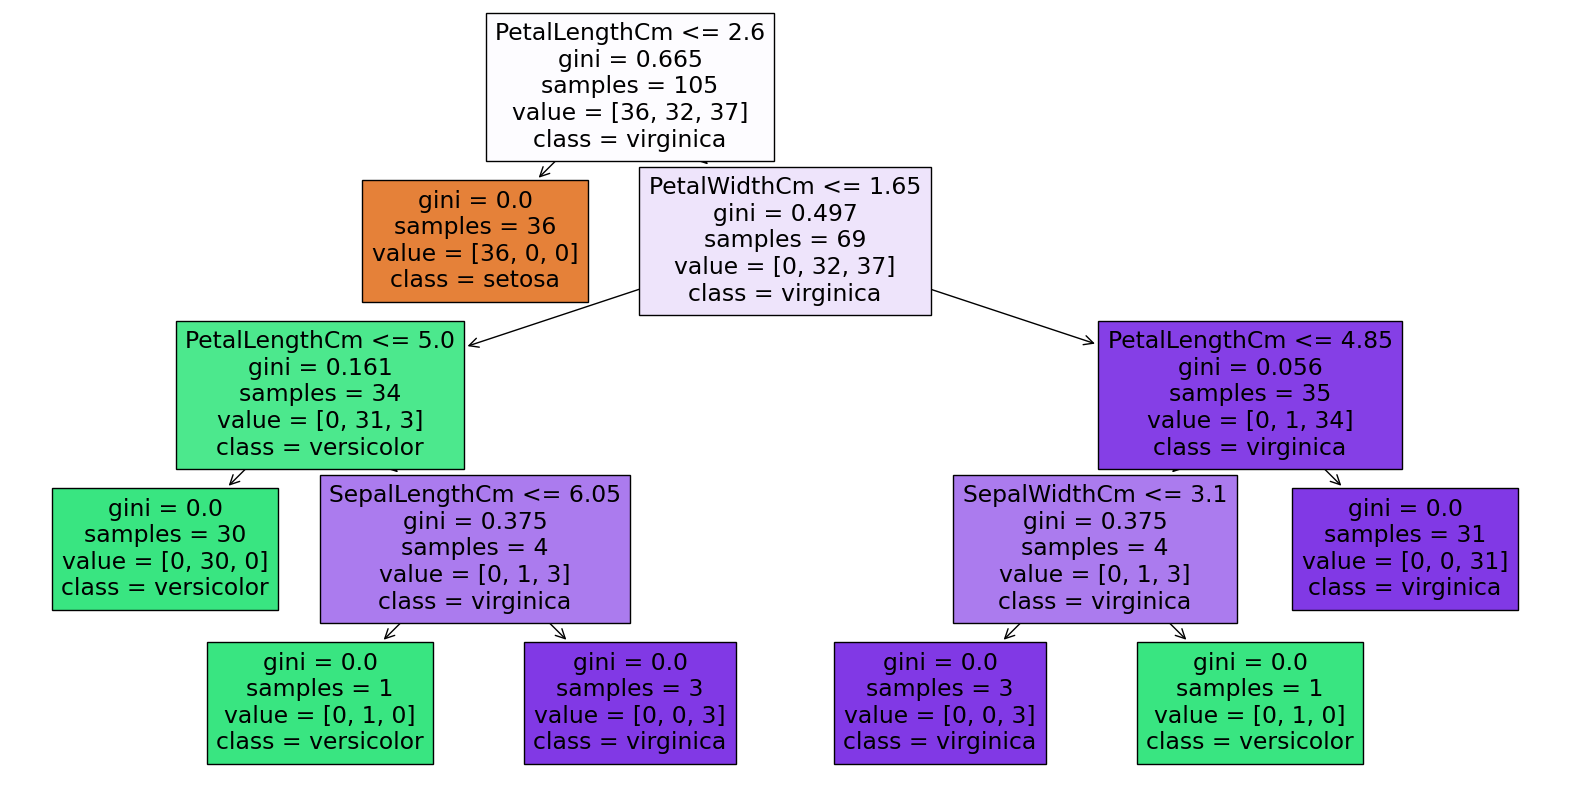

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Crear el clasificador del árbol de decisión con el criterio Gini
arbol_decision = tree.DecisionTreeClassifier(criterion="gini")

# Entrenar el árbol con el conjunto de entrenamiento
arbol = arbol_decision.fit(X_train, y_train)

# Evaluar la precisión del árbol utilizando el conjunto de prueba
accuracy = arbol_decision.score(X_test, y_test)
print("Precisión del árbol de decisión:", accuracy)

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(arbol, 
               feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], 
               class_names=["setosa", "versicolor", "virginica"],
               filled=True)
plt.show()

In [ ]:
def clasi(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm):
  clasifica=arbol_decision.predict([[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]])
  return (clasifica)

clasificacion=0
opcion=''
while opcion.upper() !='N':
  SL=float(input("Ingrese SepalLengthCm  : "))
  SW=float(input("Ingrese SepalWidthCm : "))
  PL= float(input("ingrese PetalLengthCm : "))
  PW= float(input("ingrese PetalWidthCm : "))
  clasificacion=clasi(SL,SW,PL,PW)
  print((clasificacion))
  opcion=str(input('Desea ingresar otro paciente S/N'))


Ingrese SepalLengthCm  : 4.8
Ingrese SepalWidthCm : 2.8
ingrese PetalLengthCm : 3.5
ingrese PetalWidthCm : 2.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[2]
Desea ingresar otro paciente S/Nn
